# Выпускная квалификационная работа - 4 Линейная Регрессия

* Провести предобработку данных (нормализацию)
* Обучить нескольких моделей для прогноза:
1. модуля упругости при растяжении
2. прочности при растяжении
* При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей.
* При построении моделей провести поиск гиперпараметров модели с помощью поиска
по сетке с перекрестной проверкой, количество блоков равно 10.

In [56]:
import warnings; warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
pd.options.mode.chained_assignment = None

In [57]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, cross_validate

# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures



In [58]:
from scipy import stats
from scipy.stats import shapiro, kstest, boxcox
import statsmodels.api as sm

## Загрузка данных

In [59]:
df_outliers_cleaned = pd.read_excel('data/data_outliers_cleaned.xlsx', index_col=0)
df_outliers_cleaned.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [60]:
df_outliers_cleaned.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,2.925683,1974.040023,738.247627,110.916216,22.209030,286.040414,482.993901,73.305127,2467.488822,217.613374,46.057692,6.915585,57.451895
std,0.893712,70.808120,328.708665,27.037891,2.394871,39.400677,280.190377,3.037381,463.838911,57.827255,45.011619,2.509672,11.239331
min,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698,0.000000,0.037639,27.272928
25%,2.321931,1923.443748,498.577158,92.523816,20.571516,259.184486,266.004099,71.248823,2146.936034,179.489091,0.000000,5.134988,50.209656
50%,2.904731,1977.258043,738.736842,111.113175,22.184713,286.024118,457.732246,73.259230,2457.959767,218.388715,90.000000,6.943337,57.584225
75%,3.546650,2020.158764,958.418993,130.001450,23.961818,312.991425,695.900862,75.310788,2755.169485,256.396777,90.000000,8.591450,64.798211
max,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3705.672523,359.052220,90.000000,13.732404,86.012427


In [61]:
df_outliers_cleaned.shape

(936, 13)

In [62]:
# Обучить нескольких моделей для прогноза модуля упругости при растяжении

In [63]:
target_var_2 = df_outliers_cleaned['Прочность при растяжении, МПа']
train_vars_2 = df_outliers_cleaned.loc[:, df_outliers_cleaned.columns != 'Прочность при растяжении, МПа']

# Разбиваем выборки на обучающую 70% и тестовую 30%
Xtrain, X_test, ytrain, y_test = train_test_split(train_vars_2, target_var_2, test_size=0.3, random_state=0)

Xtrain.shape, X_test.shape

((655, 12), (281, 12))

In [64]:
# Проверка правильности разбивки 
df_outliers_cleaned.shape[0] - Xtrain.shape[0] - X_test.shape[0]

0

In [65]:
# датафрейм названия моделей и их ошибки
df_errors = pd.DataFrame(columns=['target_var','model_name','MSE', 'R2'])

# функция для визуализации факт-прогноз результатов моделей

def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label='Тест')
    plt.plot(predict, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()

In [66]:
# Преобразуем данные ближе к распределению Гаусса 
# присутствуют отрицательные значения будем использовать Преобразование Йео-Джонсона (yeo-johnson)
# Преобразование Йео-Джонсона можно применять как к положительным, так и к отрицательным значениям переменной.

trans_pipe = make_pipeline(PowerTransformer(method='yeo-johnson', standardize=True), RobustScaler())

preproc = ColumnTransformer(
    transformers=[
        ('all_column', trans_pipe, Xtrain.columns)
    ]
)

model = LinearRegression()

linear_reg_1 = Pipeline(steps=[
    ('preproc', preproc),
    ('model', model)
], verbose=True)

linear_reg_1.fit(Xtrain, ytrain)
prediction_y_test_linear_1 = linear_reg_1.predict(X_test)

MSE_1 = mean_squared_error(y_test, prediction_y_test_linear_1)
MAE_1 = mean_absolute_error(y_test, prediction_y_test_linear_1)
R2_1 = r2_score(y_test, prediction_y_test_linear_1)

linear_errors1 = pd.DataFrame({'model_name':'LinearRegression_1', 'target_var':['Прочность при растяжении, МПа'], \
    'MSE':[MSE_1],   'R2':[R2_1]} )

# mean_absolute_error(y_1_test, prediction_y_test_linear_1), r2_score(y_1_test, prediction_y_test_linear_1), MSE_1, R2_1
# linear_errors1
df_errors = pd.concat([df_errors, linear_errors1], ignore_index=True)
df_errors


[Pipeline] ........... (step 1 of 2) Processing preproc, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


,target_var,model_name,MSE,R2
0,"Прочность при растяжении, МПа",LinearRegression_1,220642.417735,-0.016875


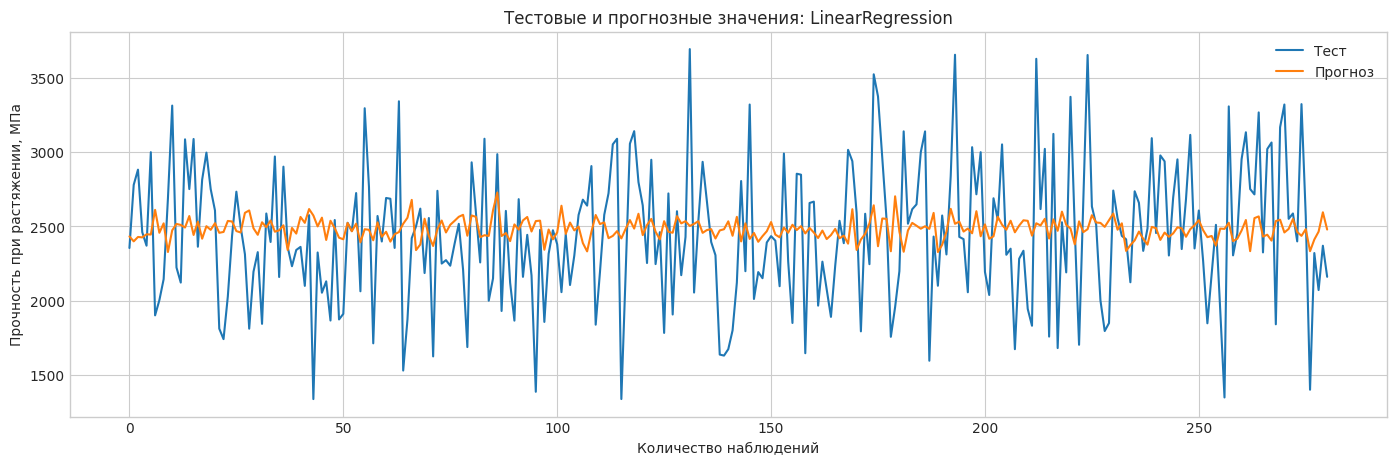

In [67]:
actual_and_predicted_plot(y_test.values, prediction_y_test_linear_1, 'Прочность при растяжении, МПа', 'LinearRegression')

In [68]:
neigh = KNeighborsRegressor()
neigh_params = {'n_neighbors' : range(1, 101, 1), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

gs_cv10_neigh_1 = GridSearchCV(neigh, neigh_params, n_jobs=-1, cv=10)
gs_cv10_neigh_1.fit(Xtrain, ytrain)
# GSCV_neigh_1.best_params_
neigh_1 = gs_cv10_neigh_1.best_estimator_

MSE_1 = mean_squared_error(y_test, neigh_1.predict(X_test))
R2_1 = r2_score(y_test, neigh_1.predict(X_test))


neigh_errors = pd.DataFrame({'model_name':'KNeighborsRegressor_1',\
                                'target_var':['Прочность при растяжении, МПа'],\
                               'MSE':[MSE_1],\
                               'R2':[R2_1]})
df_errors = pd.concat([df_errors, neigh_errors], ignore_index=True)
df_errors

,target_var,model_name,MSE,R2
0,"Прочность при растяжении, МПа",LinearRegression_1,220642.417735,-0.016875
1,"Прочность при растяжении, МПа",KNeighborsRegressor_1,217013.008574,-0.000148


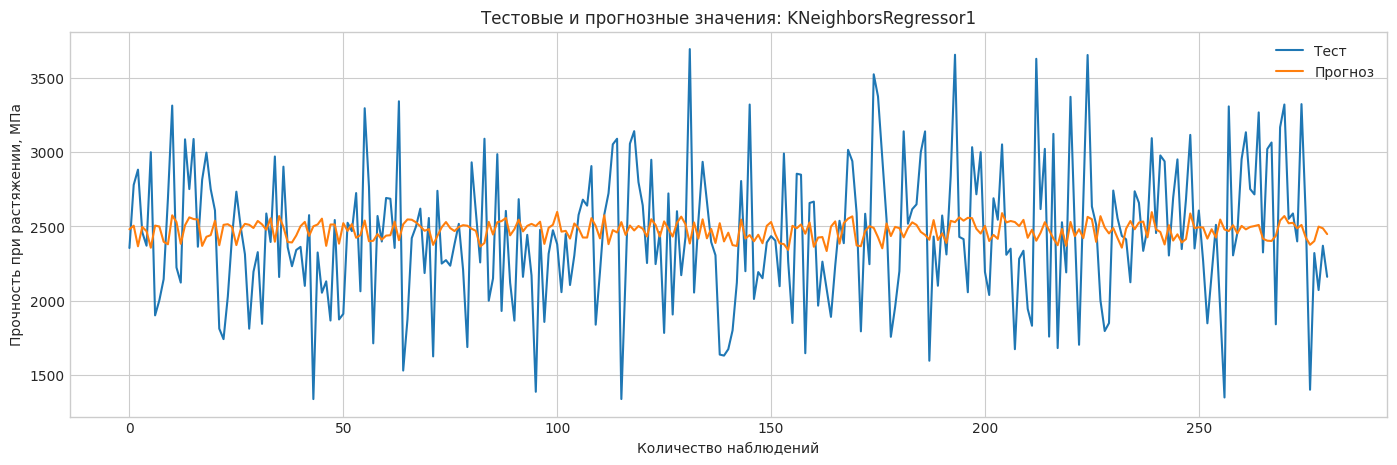

In [69]:
actual_and_predicted_plot(y_test.values, neigh_1.predict(X_test), 'Прочность при растяжении, МПа', 'KNeighborsRegressor1')

#### регрессия , Случайный лес, гиперпараметры по умолчанию 

In [70]:

model = RandomForestRegressor(random_state=0)

rf_reg_1 = Pipeline(steps=[
    ('model', model)
], verbose=True)

rf_reg_1.fit(Xtrain, ytrain)
prediction_y_test_rf_reg_1 = rf_reg_1.predict(X_test)

MSE_1 =  mean_squared_error(y_test, prediction_y_test_rf_reg_1)
MAE_1 = mean_absolute_error(y_test, prediction_y_test_rf_reg_1)
R2_1 =             r2_score(y_test, prediction_y_test_rf_reg_1)

linear_errors1 = pd.DataFrame({'model_name':'RandomForestRegressor_1', 'target_var':['Прочность при растяжении, МПа'], \
    'MSE':[MSE_1],   'R2':[R2_1]} )

df_errors = pd.concat([df_errors, linear_errors1], ignore_index=True)
df_errors


[Pipeline] ............. (step 1 of 1) Processing model, total=   0.5s


,target_var,model_name,MSE,R2
0,"Прочность при растяжении, МПа",LinearRegression_1,220642.417735,-0.016875
1,"Прочность при растяжении, МПа",KNeighborsRegressor_1,217013.008574,-0.000148
2,"Прочность при растяжении, МПа",RandomForestRegressor_1,227395.398791,-0.047997


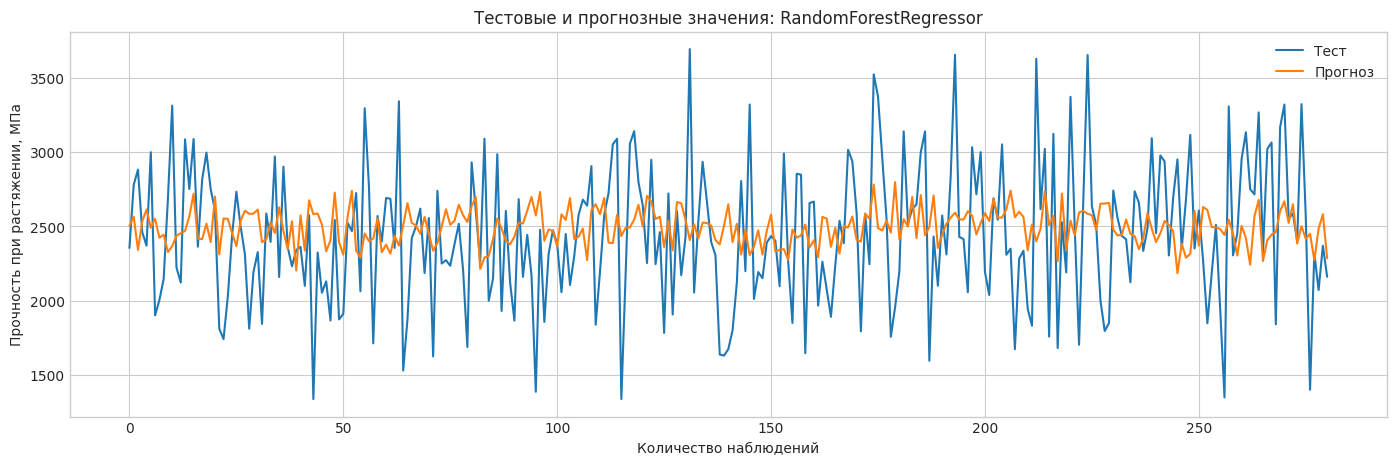

In [71]:
actual_and_predicted_plot(y_test.values, rf_reg_1.predict(X_test), 'Прочность при растяжении, МПа', 'RandomForestRegressor')

#### регрессия Случайный лес поиск гиперпараметров по сетке с перекрестной проверкой, количество блоков равно 10 

In [72]:
regr_rf_gs = RandomForestRegressor(random_state=0)

regr_rf_params = {
    'n_estimators' : range(1, 50, 10),
    'max_features': ['sqrt', 'log2'],
    'max_depth' : range(1, 5, 1),
    'criterion':['squared_error']
}

GScv10_regr_rf_1 = GridSearchCV(regr_rf_gs, regr_rf_params, cv=10, verbose=1)
GScv10_regr_rf_1.fit(Xtrain, ytrain)
# print(GScv10_regr_rf_1.best_params_)
regr_rf_1 = GScv10_regr_rf_1.best_estimator_

MSE_1 = mean_squared_error(y_test, regr_rf_1.predict(X_test))
R2_1 = r2_score(y_test, regr_rf_1.predict(X_test))

rf1_errors = pd.DataFrame({'model_name':'RandomForestRegressor_1_grid_search',\
                                'target_var':['Прочность при растяжении, МПа'],\
                               'MSE':[MSE_1, ],\
                               'R2':[R2_1, ]})

df_errors = pd.concat([df_errors, rf1_errors], ignore_index=True)
df_errors

Fitting 10 folds for each of 40 candidates, totalling 400 fits


,target_var,model_name,MSE,R2
0,"Прочность при растяжении, МПа",LinearRegression_1,220642.417735,-0.016875
1,"Прочность при растяжении, МПа",KNeighborsRegressor_1,217013.008574,-0.000148
2,"Прочность при растяжении, МПа",RandomForestRegressor_1,227395.398791,-0.047997
3,"Прочность при растяжении, МПа",RandomForestRegressor_1_grid_search,217935.825199,-0.004401


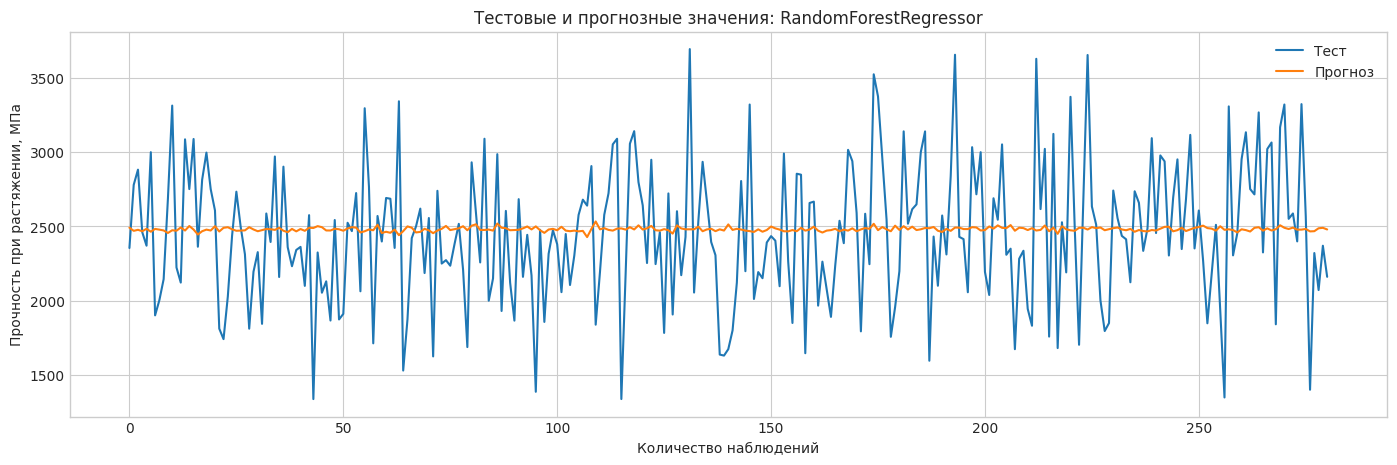

In [73]:
actual_and_predicted_plot(y_test.values, regr_rf_1.predict(X_test), 'Прочность при растяжении, МПа', 'RandomForestRegressor')

#### Многослойный перцептрон

In [74]:
# %%time

# neuronet = MLPRegressor(random_state=14)
# neuronet_params = {
#     'hidden_layer_sizes' : [(12, 24, 48, 96, 1),  (12, 12, 12, 12, 12), ()],
#     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#     'solver' : ['sgd', 'adam'],
#     'max_iter' : [100],
#     'learning_rate' : ['constant', 'adaptive', 'invscaling']
# }

# GSCV_neuronet_1 = GridSearchCV(neuronet, neuronet_params, n_jobs=-1, cv=10, verbose=1)
# GSCV_neuronet_1.fit(Xtrain, ytrain)
# # GSCV_neuronet_1.best_params_
# neuronet_1 = GSCV_neuronet_1.best_estimator_

# MSE_1 = mean_squared_error(y_test, neuronet_1.predict(X_test))
# R2_1 = r2_score(y_test, neuronet_1.predict(X_test))

# neuronet_errors = pd.DataFrame({'model_name':'MLPRegressor',\
#                                 'target_var':['Прочность при растяжении, МПа'],\
#                                'MSE':[MSE_1, ],\
#                                'R2':[R2_1, ]})
# df_errors = pd.concat([df_errors, neuronet_errors], ignore_index=True)
# df_errors

In [75]:
# GSCV_neuronet_1.best_params_

In [76]:
# actual_and_predicted_plot(y_test.values, neuronet_1.predict(X_test), 'Прочность при растяжении, МПа', 'MLPRegressor')

#### Лассо регрессия

In [77]:
lasso = Lasso(random_state=0)
lasso_params = {
   'alpha': np.linspace(0, 1, 100)
}
GSCV_lasso_1 = GridSearchCV(lasso, lasso_params, cv=10, verbose=1)
GSCV_lasso_1.fit(Xtrain, ytrain)
# GSCV_lasso_1.best_params_ 

lasso_1 = GSCV_lasso_1.best_estimator_

MSE_1 = mean_squared_error(y_test, lasso_1.predict(X_test))
R2_1 = r2_score(y_test, lasso_1.predict(X_test))

lasso_errors = pd.DataFrame({'model_name':'Lasso1_grid_search',\
            'target_var':['Прочность при растяжении, МПа', ],\
            'MSE':[MSE_1, ],\
            'R2':[R2_1, ]})
df_errors = pd.concat([df_errors, lasso_errors], ignore_index=True)
df_errors

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


,target_var,model_name,MSE,R2
0,"Прочность при растяжении, МПа",LinearRegression_1,220642.417735,-0.016875
1,"Прочность при растяжении, МПа",KNeighborsRegressor_1,217013.008574,-0.000148
2,"Прочность при растяжении, МПа",RandomForestRegressor_1,227395.398791,-0.047997
3,"Прочность при растяжении, МПа",RandomForestRegressor_1_grid_search,217935.825199,-0.004401
4,"Прочность при растяжении, МПа",Lasso1_grid_search,220753.264979,-0.017385


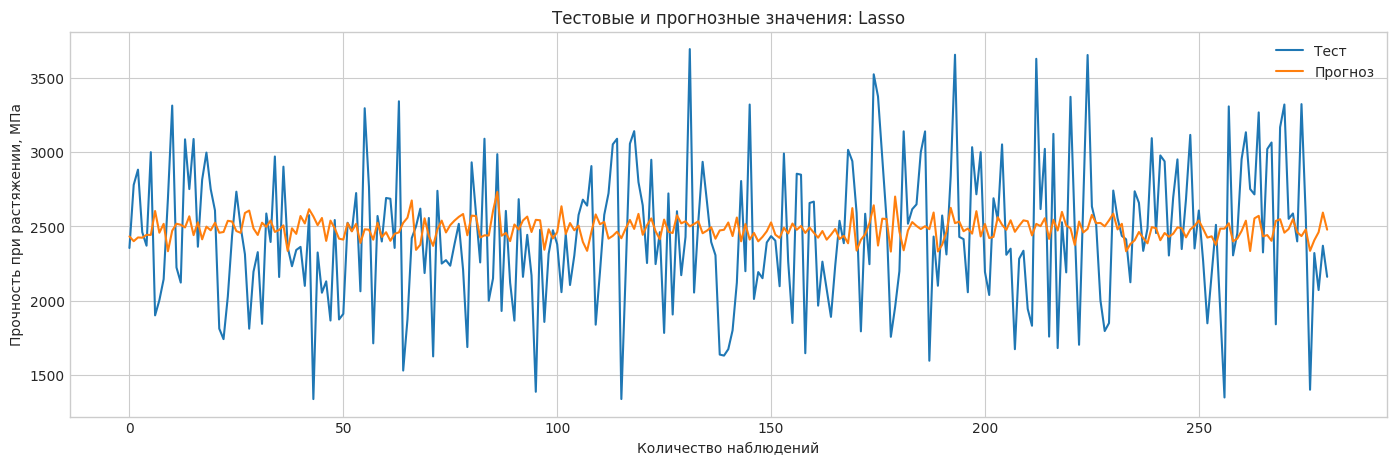

In [78]:
actual_and_predicted_plot(y_test.values, lasso_1.predict(X_test), 'Прочность при растяжении, МПа', 'Lasso')

## Итоговый датасет с ошибками

In [79]:
df_errors

,target_var,model_name,MSE,R2
0,"Прочность при растяжении, МПа",LinearRegression_1,220642.417735,-0.016875
1,"Прочность при растяжении, МПа",KNeighborsRegressor_1,217013.008574,-0.000148
2,"Прочность при растяжении, МПа",RandomForestRegressor_1,227395.398791,-0.047997
3,"Прочность при растяжении, МПа",RandomForestRegressor_1_grid_search,217935.825199,-0.004401
4,"Прочность при растяжении, МПа",Lasso1_grid_search,220753.264979,-0.017385


#### Алгоритм полиномиальной регрессии

In [80]:
pipe = make_pipeline(PowerTransformer(), RobustScaler(), PolynomialFeatures(), Ridge())

param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    }

grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)

grid.fit(Xtrain, ytrain)
print("Лучшая модель:\n{}".format(grid.best_estimator_))

mean_squared_error(y_test, grid.predict(X_test)), r2_score(y_test, grid.predict(X_test))



Лучшая модель:
Pipeline(steps=[('powertransformer', PowerTransformer()),
                ('robustscaler', RobustScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('ridge', Ridge(alpha=100))])


(219385.28204390264, -0.011080769446115024)

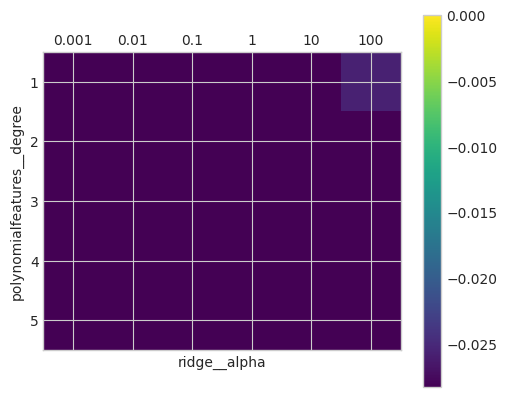

In [81]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(len(param_grid['polynomialfeatures__degree']), -1), vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
param_grid['polynomialfeatures__degree'])
plt.colorbar()